In [2]:
import numpy as np
import pandas as pd

In [3]:
sexo=['M','F','Otro']
estatura= ['<150cm','150-170cm','170-190cm','>190cm']
cabello=['Corto','Mediano (hasta orejas)','Largo (supera hombros)']
color=['Rojo','Rubio','Castaño','Negro','Otro']
delineador=['Si','No']

In [4]:
# Creacion de datos artificiales
v_sexo  = np.random.choice(sexo, 10000)
v_estatura = np.random.choice(estatura, 10000)
v_cabello = np.random.choice(cabello, 10000)
v_color = np.random.choice(color, 10000)
v_delineador=np.random.choice(delineador, 10000)

In [16]:
df = pd.DataFrame()
df['Sexo'] = v_sexo 
df['Estatura'] = v_estatura
df['Cabello'] = v_cabello
df['Color'] = v_color
df['Delineador'] = v_delineador
#df['Delineador'] = np.where(((df['Sexo']=='F') & ((df['Estatura'] == '<150cm')|(df['Estatura'] == '150-170cm'))) | 
#                            ((df['Sexo']=='M') & ((df['Estatura'] == '150-170cm')|(df['Estatura'] == '>190cm'))), 
#                            'Si', 'No')
df.head()

,Sexo,Estatura,Cabello,Color,Delineador
0,M,>190cm,Corto,Rojo,Si
1,M,170-190cm,Mediano (hasta orejas),Otro,Si
2,Otro,150-170cm,Corto,Castaño,No
3,F,150-170cm,Mediano (hasta orejas),Castaño,No
4,M,150-170cm,Mediano (hasta orejas),Rojo,No


In [17]:
df.Delineador.value_counts()

No    5079
Si    4921
Name: Delineador, dtype: int64

In [18]:
X = df.drop(columns='Delineador')
y = df['Delineador']

In [19]:
X_new = pd.get_dummies(X)
X_new

,Sexo_F,Sexo_M,Sexo_Otro,Estatura_150-170cm,Estatura_170-190cm,Estatura_<150cm,Estatura_>190cm,Cabello_Corto,Cabello_Largo (supera hombros),Cabello_Mediano (hasta orejas),Color_Castaño,Color_Negro,Color_Otro,Color_Rojo,Color_Rubio
0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
9996,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
9997,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9998,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [21]:
#entrenar el arbol.

from sklearn import tree 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [22]:
y_train.unique()

array(['Si', 'No'], dtype=object)

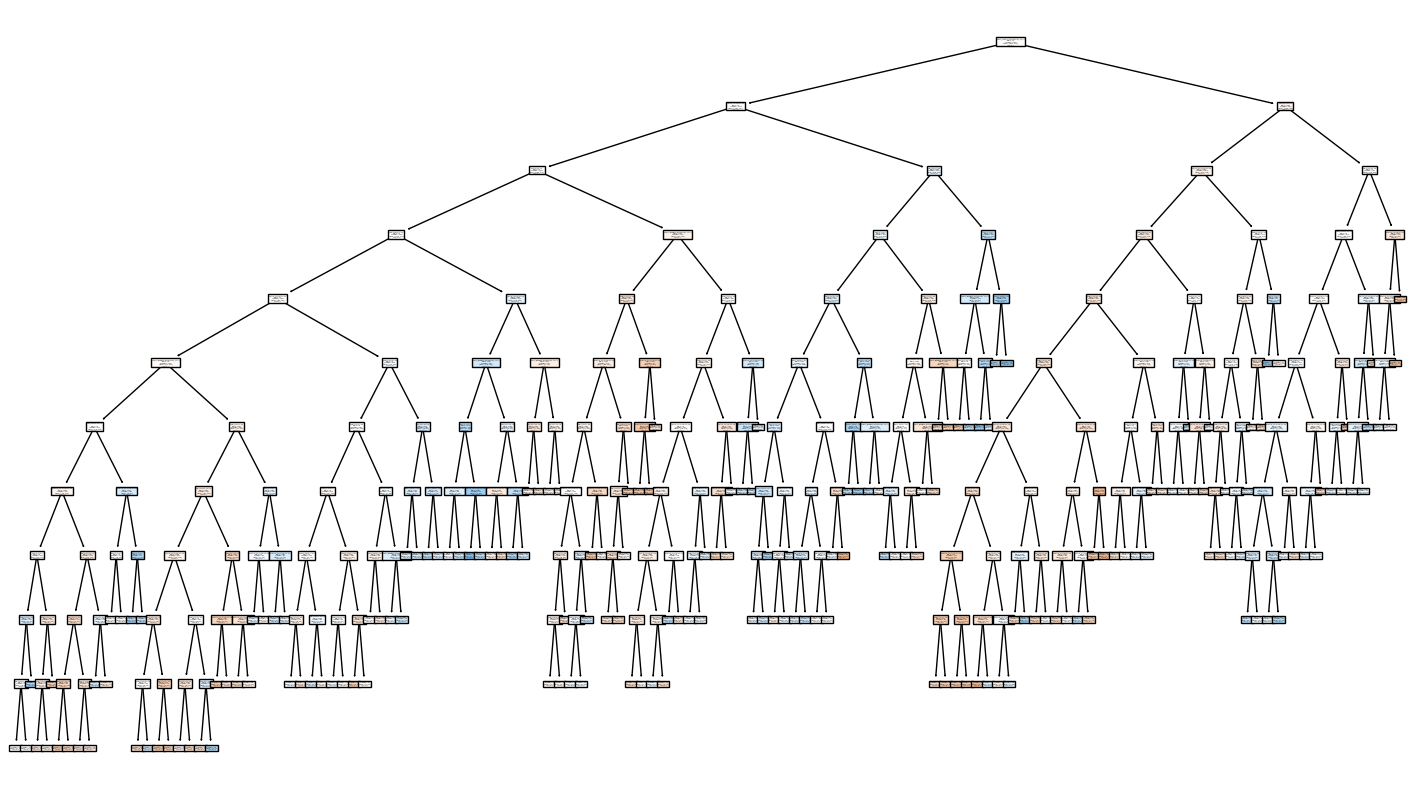

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)

In [24]:
y_pred = clf.predict(X_test)
y_pred

array(['No', 'Si', 'Si', ..., 'Si', 'Si', 'No'], dtype=object)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.52      0.55      0.53      1539
          Si       0.49      0.46      0.48      1461

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

